In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Linear regression with one variable

In [2]:
import os
path = os.getcwd() + '/dane1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])

### Ex. 1



In [3]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


### Ex. 2

Text(0, 0.5, 'Profit')

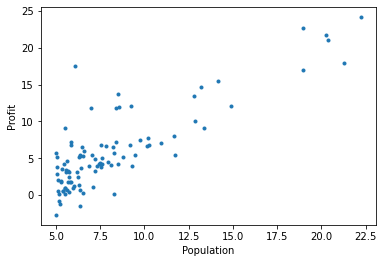

In [5]:
plt.plot(data.Population, data.Profit, marker='.',  linewidth=0)
plt.xlabel("Population")
plt.ylabel("Profit")

### Ex. 3

In [6]:
data.insert(loc=0, column='ones', value=[1]*len(data))

In [7]:
data.head()

,ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


### Ex. 4

In [8]:
X = data.drop(['Profit'], axis=1)
X.head(2)

,ones,Population
0,1,6.1101
1,1,5.5277


In [9]:
y = data.Profit
y.head(2)

0    17.5920
1     9.1302
Name: Profit, dtype: float64

In [10]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0.0,0.0]))

### Ex. 5 & Ex. 6 

In [11]:
def computeCost(X, y, theta):
  cost = 0
  for i in range(len(X)):
    cost = cost + (theta * X[i].T - y.item(i))**2
  return cost.item(0)/(2*len(X))

### Ex. 7 

In [12]:
print("Theta: ", theta)
computeCost(X, y, theta)

Theta:  [[0. 0.]]


32.072733877455654

## Gradient descent method



### Ex. 8

In [13]:
from copy import deepcopy

def gradient_prosty(X, y, theta, alpha=0.01, it=1000):
    # it - iteration nb.
    theta_opt = deepcopy(theta)
    m = len(X)
    cost = []
    for iter in range(it):
      d_0 = 0
      d_1 = 0 
      for i in range(m):
        d_0 = d_0 + theta_opt* X[i].T - y.item(i)
        d_1 = d_1 + (theta_opt* X[i].T - y.item(i)) * X[i].item(1)
      th_0 = theta_opt.item(0) - alpha*1/m * d_0.item(0)
      th_1 = theta_opt.item(1) - alpha*1/m * d_1.item(0)
      cost.append(computeCost(X, y, theta_opt))

      theta_opt.itemset(0, th_0) 
      theta_opt.itemset(1, th_1)
             
    return theta_opt,  cost

### Ex. 9 

In [14]:
theta = np.matrix(np.array([0.0,0.0]))
theta_opt, cost_list = gradient_prosty(X, y, theta)

print("Theta initialized: ", theta)
print("Theta optimized: ", theta_opt)

Theta initialized:  [[0. 0.]]
Theta optimized:  [[-3.24140214  1.1272942 ]]


### Ex. 10 

In [15]:
cost = computeCost(X, y, theta_opt)
cost

4.5159555030789145

### Ex. 11 

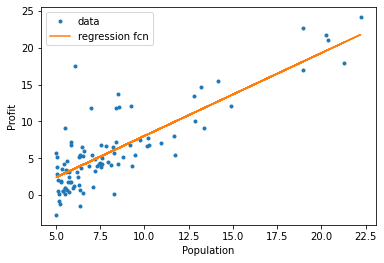

In [16]:
plt.plot(data.Population, data.Profit, marker='.',  linewidth=0)
plt.xlabel("Population")
plt.ylabel("Profit")

val =theta_opt * X.T
plt.plot(data.Population, val.T)

plt.legend(["data", "regression fcn"])

### Ex. 12

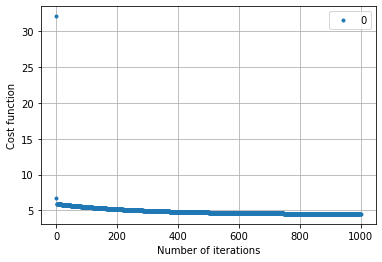

In [17]:
cost_df = pd.DataFrame(data = cost_list)
cost_df.plot(marker = '.', linewidth = 0)
plt.xlabel("Number of iterations")
plt.ylabel("Cost function")
plt.grid()

# Linear regression with multiple variables

In [18]:
path = os.getcwd() + '/dane2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


### Ex. 1

In [19]:
data2_norm = (data2 - data2.mean())/data2.std()
data2_norm.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


### Ex. 2

In [20]:
data2_norm.insert(loc=0, column='ones', value=[1]*len(data2_norm))
data2_norm.head()

,ones,Size,Bedrooms,Price
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


In [21]:
X = data2_norm.drop(['Price'], axis=1)
X.head(2)

,ones,Size,Bedrooms
0,1,0.13001,-0.223675
1,1,-0.50419,-0.223675


In [22]:
y = data2_norm.Price
y.head(2)

0    0.475747
1   -0.084074
Name: Price, dtype: float64

In [23]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0.0,0.0, 0.0]))

In [24]:
print("Theta: ", theta)
computeCost(X, y, theta)

Theta:  [[0. 0. 0.]]


0.4893617021276595

In [25]:
# theta = np.matrix(np.array([0.0,0.0]))
theta_opt, cost_list = gradient_prosty(X, y, theta)

print("Theta initialized: ", theta)
print("Theta optimized: ", theta_opt)

Theta initialized:  [[0. 0. 0.]]
Theta optimized:  [[-1.11093168e-16  8.54941833e-01  0.00000000e+00]]


In [26]:
cost = computeCost(X, y, theta_opt)
cost

0.13163644716432193

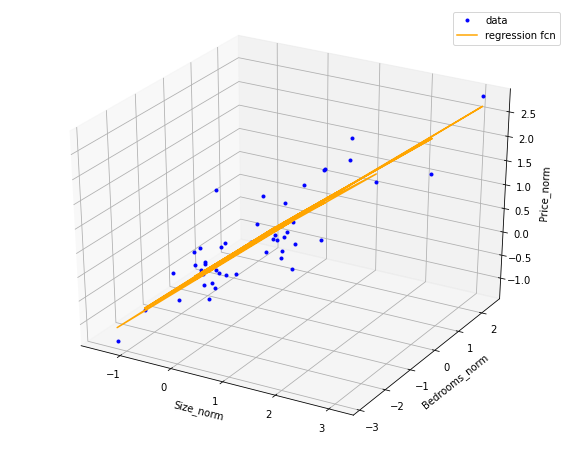

In [27]:
from mpl_toolkits import mplot3d

import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection="3d")
ax.plot3D(data2_norm.Size, data2_norm.Bedrooms, data2_norm.Price, 'blue', marker = '.', linewidth = 0)

val =theta_opt * X.T
ax.plot3D(data2_norm.Size, data2_norm.Bedrooms, np.array(val)[0], 'orange')
plt.legend(["data", "regression fcn"])

ax.set_xlabel("Size_norm")
ax.set_ylabel('Bedrooms_norm')
ax.set_zlabel('Price_norm')
plt.show()

# Linear regression - Python


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model as linm
 
# Regression models
# http://scikit-learn.org/stable/modules/linear_model.html
 
# Load the diabetes dataset
boston = datasets.load_boston()
# print description
# print(boston.DESCR)
# get the data
boston_X = boston.data
boston_Y = boston.target

### Ex. 1

In [30]:
#Normalization
boston_X_df = pd.DataFrame(boston_X)
boston_Y_df = pd.DataFrame(boston_Y)

boston_X_df = (boston_X_df - boston_X_df.mean())/boston_X_df.std()
boston_X = boston_X_df.values

boston_Y_df = (boston_Y_df - boston_Y_df.mean())/boston_Y_df.std()
boston_Y = boston_Y_df.values

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(boston_X, boston_Y, test_size=0.30)

### Ex.2 

In [32]:
from sklearn.metrics import mean_squared_error, r2_score

# Stworzenie obiektu 
regr = linm.LinearRegression()
 
# Uczenie modelu przy pomocy bazy treningowej
regr.fit(X_train, y_train)
# Przewidywanie wartości dla danych testowych
y_predicted = regr.predict(X_test)
 
# Wyświetlenie parametrów prostej
print('Coefficients: \n', regr.coef_)
 

#  Calculate MSE and R2
print("MSE: {}".format(mean_squared_error(y_test, y_predicted)))
print("R2 : {}".format(r2_score(y_test, y_predicted)))


Coefficients: 
 [[-0.12086517  0.10678403 -0.01311887  0.06384142 -0.24308471  0.25957382
  -0.0008244  -0.34213152  0.33109472 -0.23436667 -0.22942301  0.08156257
  -0.38759519]]
MSE: 0.22469031894374006
R2 : 0.7909761638911261


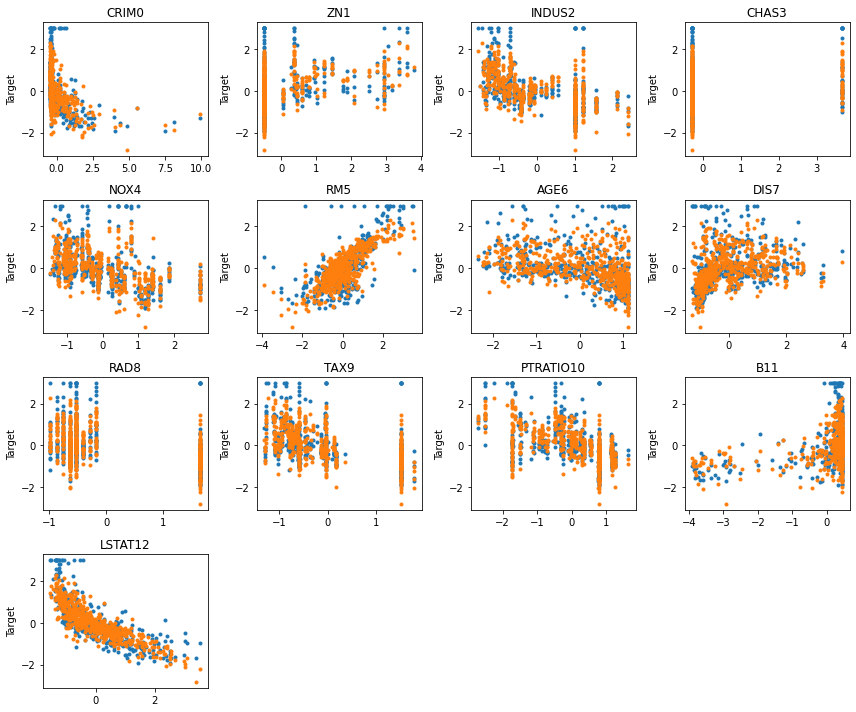

In [33]:

fig = plt.figure(figsize=(12, 10))
boston_predicted = regr.predict(boston_X)

for attr_name, attr_num in zip(boston.feature_names, boston_X_df.columns):
    ax = fig.add_subplot(4,4,attr_num+1)
    ax.plot(boston_X_df[attr_num], boston_Y, marker = '.', linewidth = 0 )
    ax.plot(boston_X_df[attr_num], boston_predicted, marker = '.', linewidth = 0 )
    ax.set_title(attr_name + str(attr_num))
    ax.set_ylabel("Target")

plt.tight_layout()
plt.show()